In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_excel(r"C:\Users\MUSKAN\Desktop\Copy of Copy of default of credit card clients.xls  -  version 1.0. 23.10.2024 6.xls")


In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0



##UNIVARIATE ANALYSIS 

TARGET VARIABLE

In [5]:

df['default payment next month'] = pd.to_numeric(df['default payment next month'])
bins=[-1,0,1]
labels=['YES','NO']
df['default payment next month_cat']=pd.cut(df['default payment next month'],bins,labels=labels)
def_pay_count=df['default payment next month_cat'].value_counts()
def_pay_pct=def_pay_count*100/30000


Text(0.5, 1.0, 'PEOPLE WITH DEFAULT PAYMENT NEXT MONTH(%)')

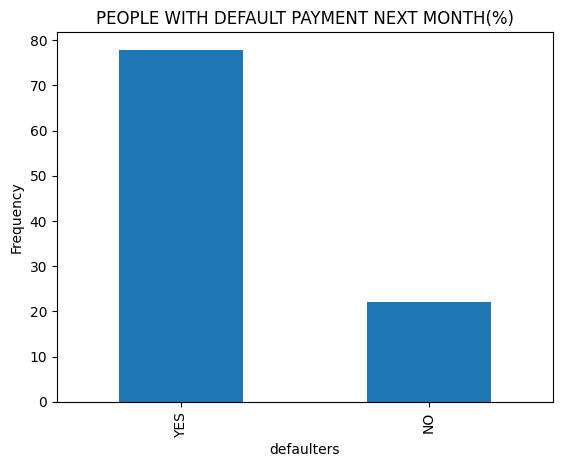

In [6]:
plot=def_pay_pct.plot(kind='bar',legend=None)
plot.set_xlabel('defaulters')
plot.set_ylabel('Frequency')
plot.set_title('PEOPLE WITH DEFAULT PAYMENT NEXT MONTH(%)')

Text(0.5, 1.0, 'BOXPLOT FOR LIMIT BALANCE')

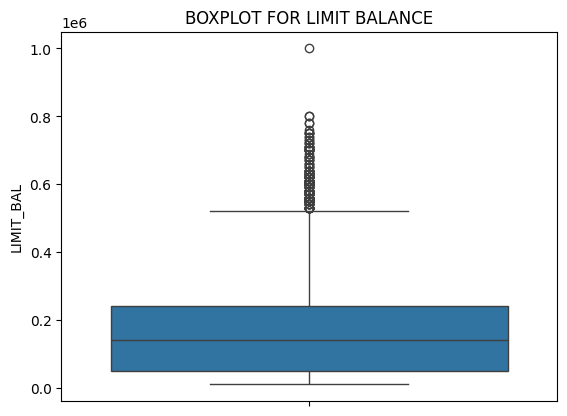

In [7]:
sns.boxplot(df['LIMIT_BAL'])
plt.title('BOXPLOT FOR LIMIT BALANCE')


In [8]:

df['AGE'].describe()


count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

Text(0, 0.5, 'FREQUENCY')

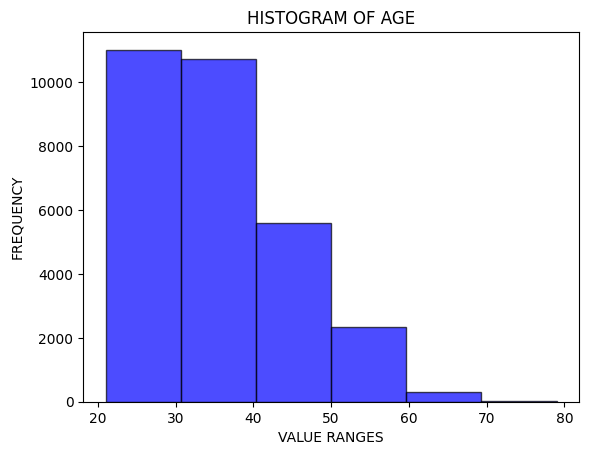

In [9]:
plt.hist(df['AGE'],bins=6,color='blue',alpha=0.7,edgecolor='black')
plt.title('HISTOGRAM OF AGE')
plt.xlabel('VALUE RANGES')
plt.ylabel('FREQUENCY')

CATEGORICAL VARIABLES

In [10]:
df['SEX']=pd.to_numeric(df['SEX'],errors='coerce')
bins=[0,1,2]
labels=['Male','Female']
df['SEX_cat']=pd.cut(df['SEX'],bins,labels=labels)
gen_count=df['SEX_cat'].value_counts()
gen_count_pct=gen_count*100/30000
gen_count_pct

SEX_cat
Female    60.373333
Male      39.626667
Name: count, dtype: float64

Text(0.5, 1.0, 'SEGMENTATION OF CLIENTS ON THE BASIS OF GENDER')

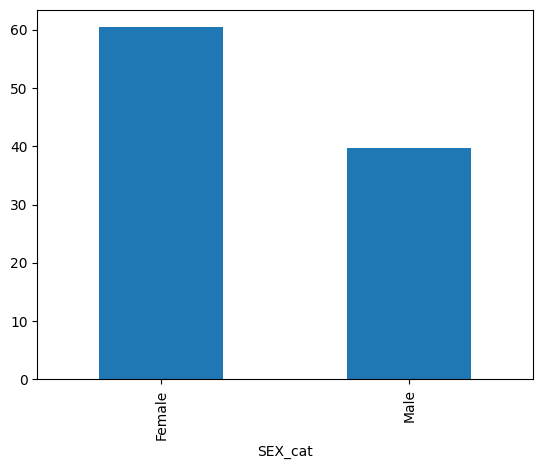

In [11]:
gen_count_pct.plot(kind='bar',legend=None)
plot.set_xlabel('Gender')
plot.set_ylabel('Frequency')
plot.set_title('SEGMENTATION OF CLIENTS ON THE BASIS OF GENDER')

Text(0.5, 1.0, 'EDUCATION OF CLIENTS')

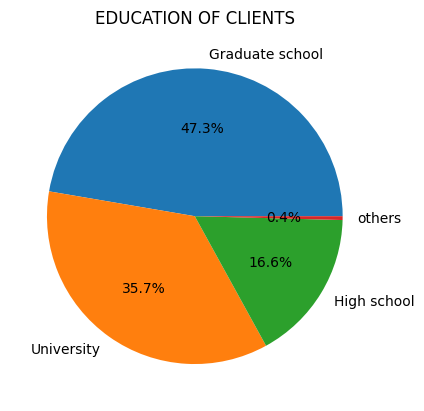

In [12]:

bins=[0,1,2,3,4]
labels=['Graduate school','University','High school','others']
df['Education_cat']=pd.cut(df['EDUCATION'],bins,labels=labels)
edu_count=df['Education_cat'].value_counts()
pct_edu_count=edu_count*100/30000
##VISUALISATION
plt.pie(pct_edu_count,labels=labels,autopct='%1.1f%%')
plt.title('EDUCATION OF CLIENTS' )


In [13]:
df['MARRIAGE']=pd.to_numeric(df['MARRIAGE'],errors='coerce')
bins=[0,1,2,3,]
labels=['Married','single','others']
df['Marriage_cat']=pd.cut(df['MARRIAGE'],bins,labels=labels)
marr_count=df['Marriage_cat'].value_counts()
marr_count_perc=(marr_count*100/30000)
print(marr_count_perc)

Marriage_cat
single     53.213333
Married    45.530000
others      1.076667
Name: count, dtype: float64


Text(0.5, 1.0, 'MARITAL STATUS OF CIENTS (%)')

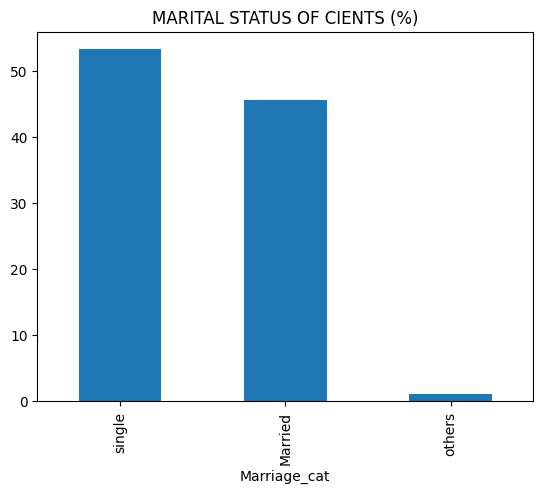

In [14]:
plot=marr_count_perc.plot(kind='bar',legend=None)
plot.set_title('MARITAL STATUS OF CIENTS (%)')

BIVARIATE ANALYSIS

<Axes: xlabel='LIMIT_BAL'>

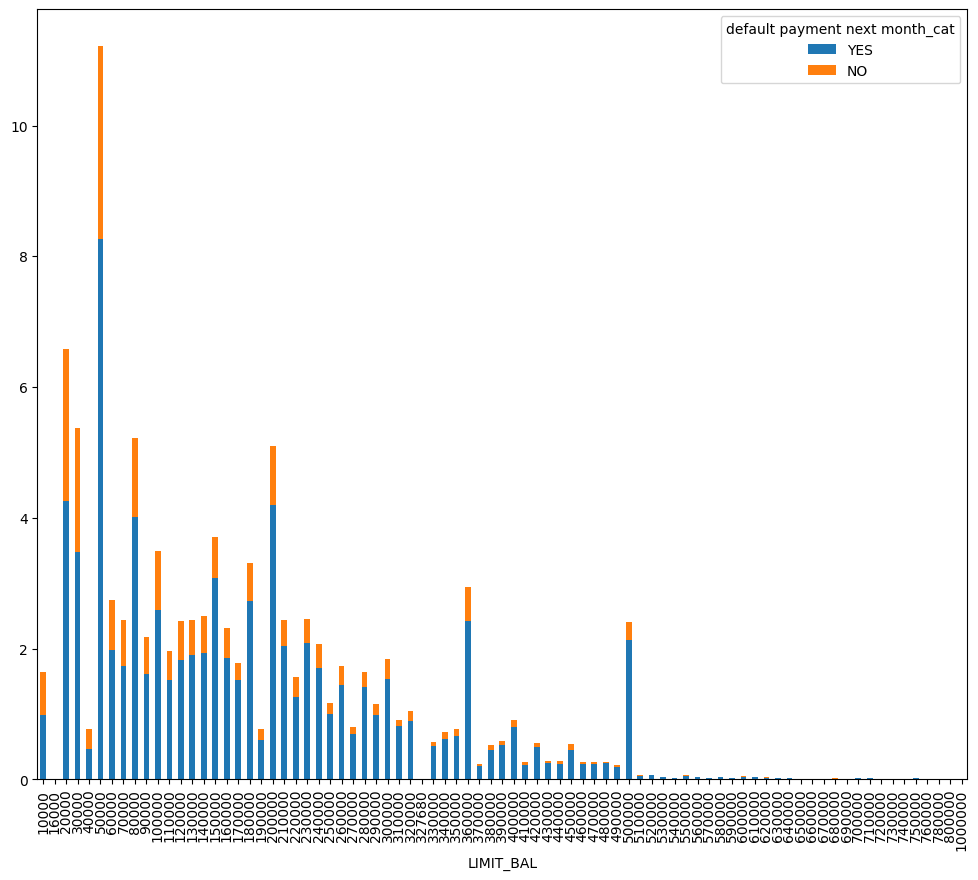

In [15]:
default_lb=pd.crosstab(df['LIMIT_BAL'],df['default payment next month_cat'])
default_lb_pct=default_lb*100/30000
default_lb_pct.plot(kind='bar',stacked=True,figsize=(12,10))

Text(0.5, 1.0, 'DEFAULTERS ACCORDING TO GENDER')

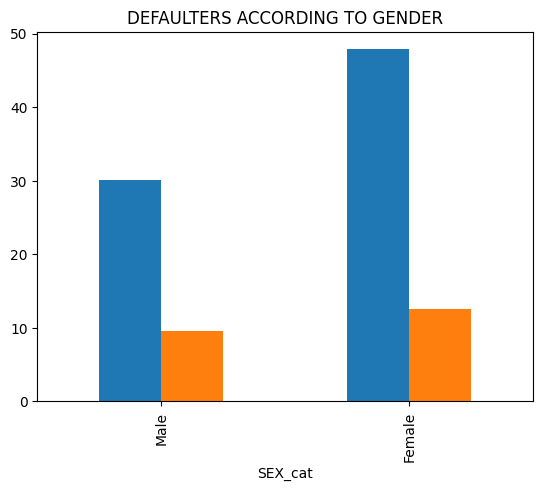

In [16]:
gender_default=pd.crosstab(df['SEX_cat'],df['default payment next month'])
gender_default_pct=gender_default*100/30000
gd_plot=gender_default_pct.plot(kind='bar',legend=None)
gd_plot.set_title('DEFAULTERS ACCORDING TO GENDER')


In [17]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,default payment next month_cat,SEX_cat,Education_cat,Marriage_cat
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,1,NO,Female,University,Married
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,1000,1000,0,2000,1,NO,Female,University,single
2,3,90000,2,2,2,34,0,0,0,0,...,1500,1000,1000,1000,5000,0,YES,Female,University,single
3,4,50000,2,2,1,37,0,0,0,0,...,2019,1200,1100,1069,1000,0,YES,Female,University,Married
4,5,50000,1,2,1,57,-1,0,-1,0,...,36681,10000,9000,689,679,0,YES,Male,University,Married


default payment next month          0          1
Marriage_cat                                    
Married                     34.843333  10.686667
single                      42.076667  11.136667
others                       0.796667   0.280000


Text(0.5, 1.0, 'MARITAL STATUS OF DEFAULTERS')

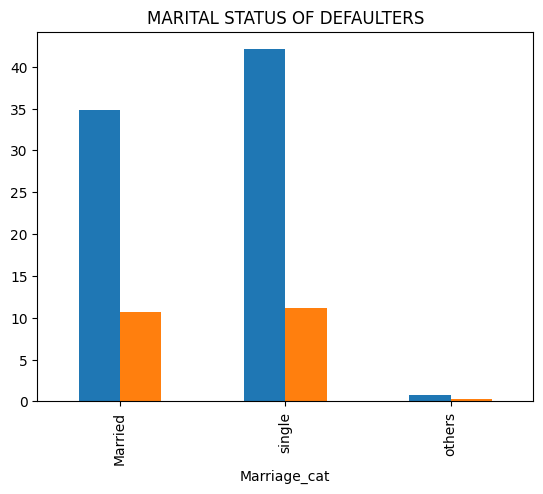

In [18]:
marriage_default=pd.crosstab(df['Marriage_cat'],df['default payment next month'])
marriage_default_pct=marriage_default*100/30000
print(marriage_default_pct)
md_plot=marriage_default_pct.plot(kind='bar',legend=None)
md_plot.set_title('MARITAL STATUS OF DEFAULTERS')


default payment next month          0          1
Education_cat                                   
Graduate school             28.496667   6.786667
University                  35.666667  11.100000
High school                 12.266667   4.123333
others                       0.386667   0.023333


Text(0.5, 1.0, 'EDUCATION STATUS OF DEFAULTERS')

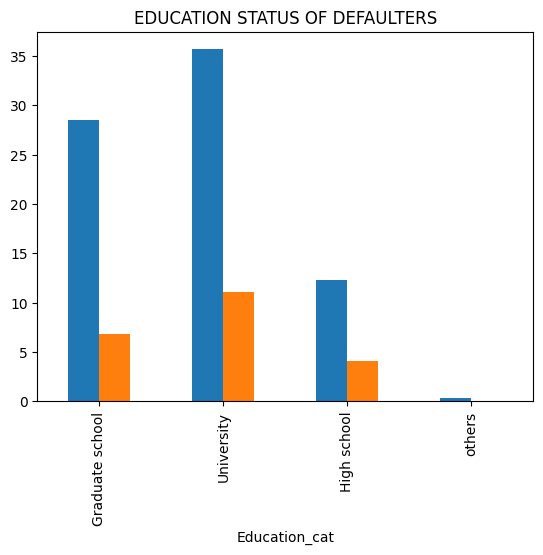

In [19]:
edu_default=pd.crosstab(df['Education_cat'],df['default payment next month'])
edu_default_pct=edu_default*100/30000
print(edu_default_pct)
edu_plot=edu_default_pct.plot(kind='bar',legend=None)
edu_plot.set_title('EDUCATION STATUS OF DEFAULTERS')

MULTIVARIATE ANALYSIS

In [20]:
df['default payment next month']=pd.to_numeric(df['default payment next month'])
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,default payment next month_cat,SEX_cat,Education_cat,Marriage_cat
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,1,NO,Female,University,Married
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,1000,1000,0,2000,1,NO,Female,University,single
2,3,90000,2,2,2,34,0,0,0,0,...,1500,1000,1000,1000,5000,0,YES,Female,University,single
3,4,50000,2,2,1,37,0,0,0,0,...,2019,1200,1100,1069,1000,0,YES,Female,University,Married
4,5,50000,1,2,1,57,-1,0,-1,0,...,36681,10000,9000,689,679,0,YES,Male,University,Married


In [28]:
df['default payment next month'].dtype
df_corr=df.corr()
correlation=df_corr['default payment next month'].sort_values(ascending=False)
print(correlation)


default payment next month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
ID                           -0.013952
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.153520
Name: default payment nex

Text(0.5, 1.0, 'CORRELATION HEATMAP')

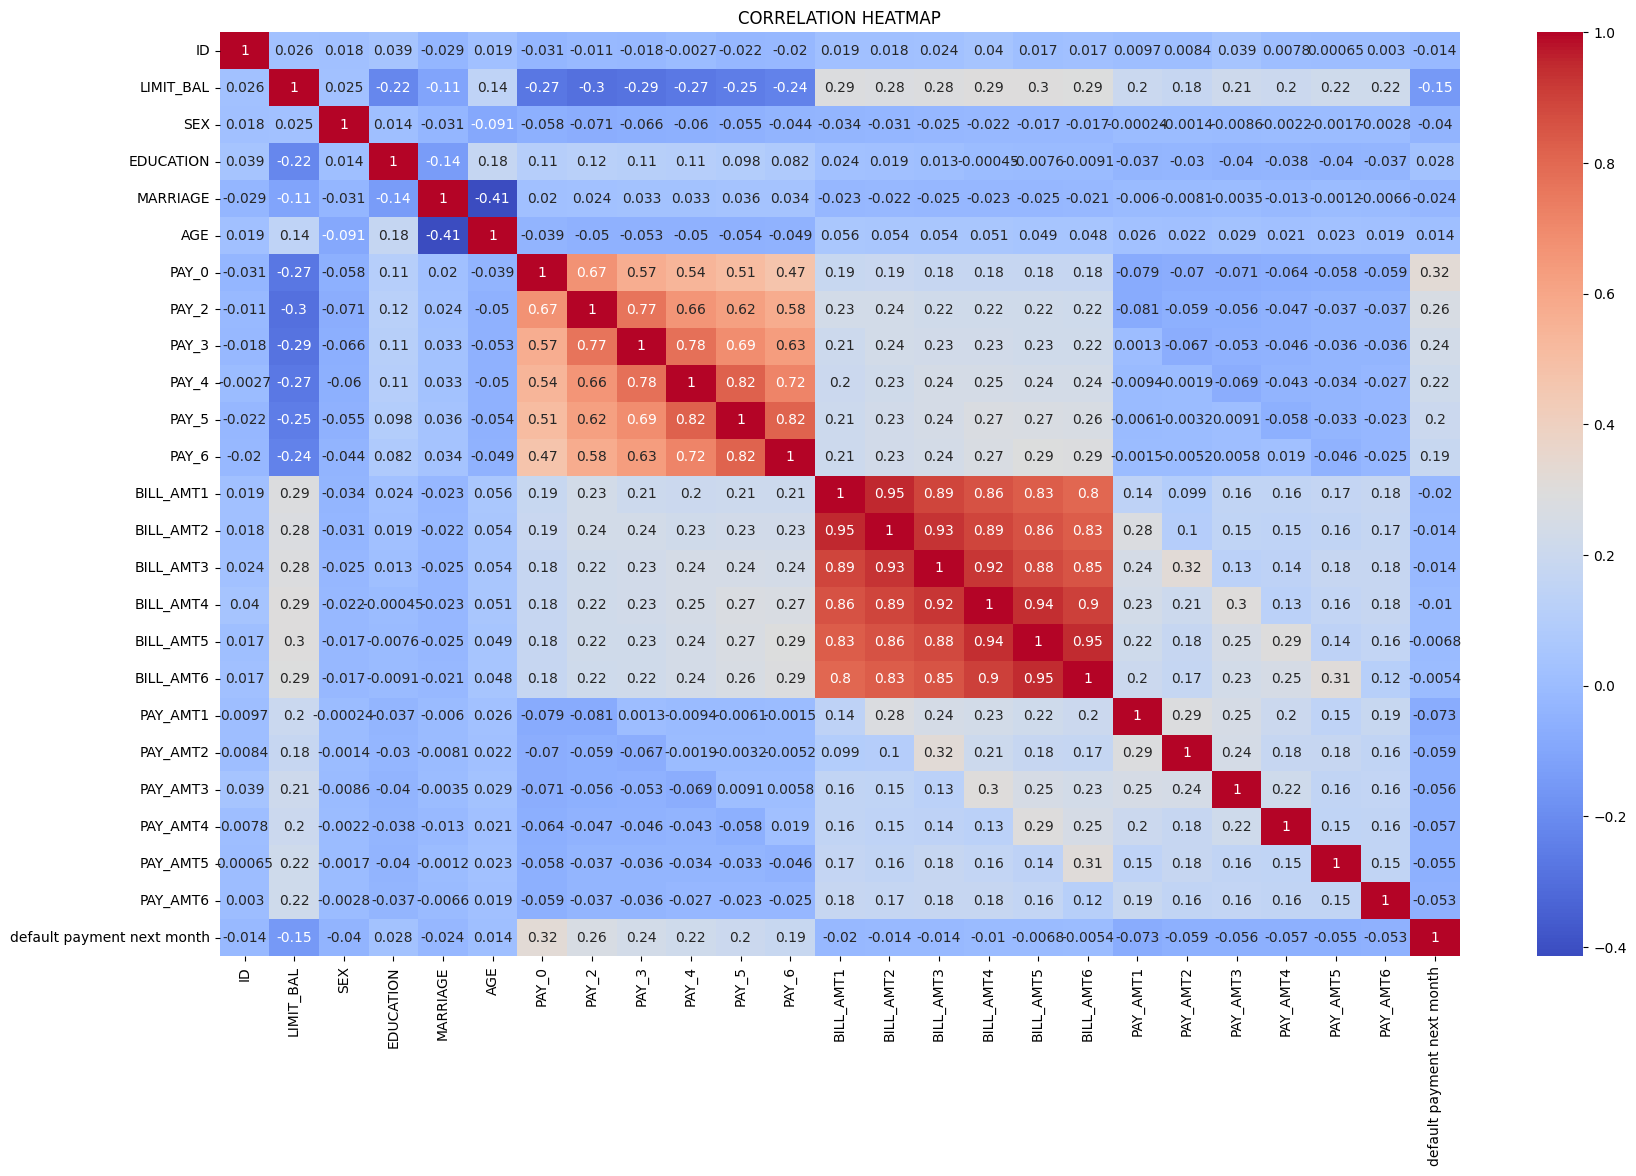

In [36]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('CORRELATION HEATMAP')